In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
data = np.load('mnist.npz')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
len(x_train)

60000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

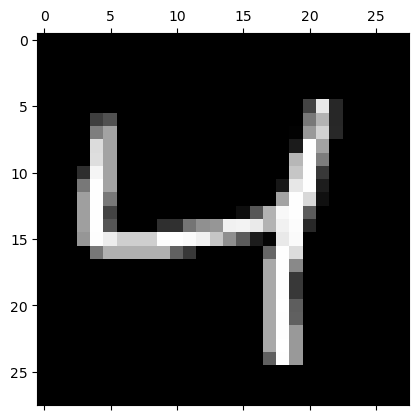

In [23]:
plt.matshow(x_train[2], cmap="gray")

In [24]:
x_train = x_train/255
x_test = x_test/255

In [25]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [11]:
import warnings
warnings.filterwarnings("ignore")
model = keras.Sequential([ # he model starts with a Flatten layer to prepare the input.
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='sgd', # stochastic gradient descent
             loss='sparse_categorical_crossentropy', # Use this crossentropy loss function when there are 
              #two or more label classes. We expect labels to be provided as integers, mutually exclusive events
             metrics=['accuracy']) # parameter is accuracy

In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.7367 - loss: 1.0469 - val_accuracy: 0.9013 - val_loss: 0.3608
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.9013 - loss: 0.3583 - val_accuracy: 0.9158 - val_loss: 0.2957
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9170 - loss: 0.2936 - val_accuracy: 0.9250 - val_loss: 0.2637
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.9249 - loss: 0.2650 - val_accuracy: 0.9307 - val_loss: 0.2399
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9324 - loss: 0.2427 - val_accuracy: 0.9361 - val_loss: 0.2237
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.9376 - loss: 0.2248 - val_accuracy: 0.9397 - val_loss: 0.2086
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9410 - loss: 0.2113 - val_accuracy: 0.9440 - val_loss: 0.1947
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.9461 -

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9440 - loss: 0.1898
Loss=0.164
Accuracy=0.953


In [16]:
import random

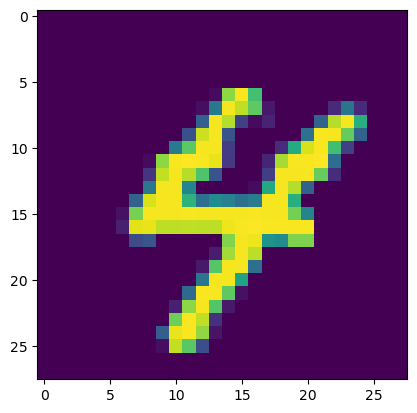

In [17]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [18]:
import numpy as np
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
Handwritten number in the image is= 4


In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Training Accuracy

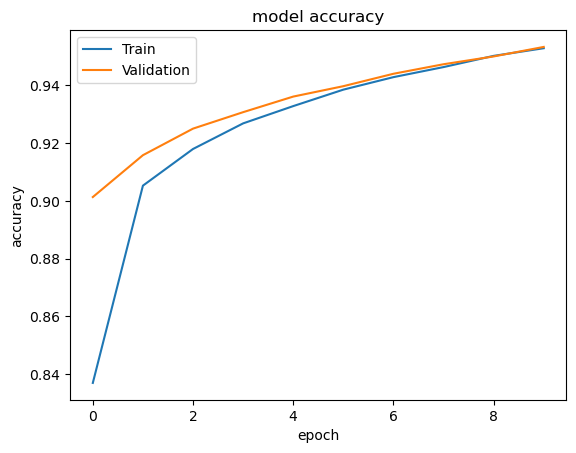

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Training Loss

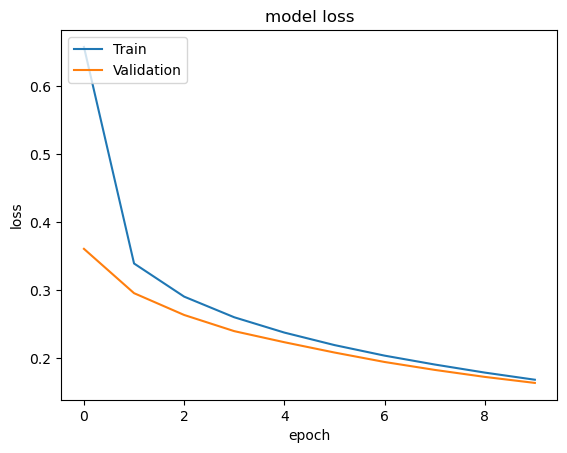

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()